In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn import svm
import math
from sklearn.datasets import fetch_openml

In [2]:
#6
df = pd.read_csv(r"C:\Users\jason\Desktop\cse 151a\hw7\data0.txt", sep= ' ', header=None)
df = df[[0,1,2]]
df.columns = ['var1','var2','label']
x = df[['var1','var2']].to_numpy()
y = df['label'].to_numpy()

In [3]:
#6
def label_return(w,b,x):
    preds = []
    for each in w:
        preds.append(np.dot(w[each],x) + b[each])
    return np.argmax(preds)

def label_return_plot(w,b,x):
    return np.argmax(np.dot(w,x.T).T+b, axis = 1)


def multiperceptron(data, labels):
    wk = {}
    bk = {}
    for j in np.unique(labels):
        wk[j] = np.zeros(len(data[0]))
        bk[j] = 0
    while True:
        errors = 0
        for i in range(len(labels)):
            xi = data[i]
            yi = labels[i]
            predict = label_return(wk,bk,xi)
            if predict != yi:
                wk[predict] = wk[predict] - xi
                bk[predict] = bk[predict] - 1
                errors += 1
                wk[yi] = wk[yi] + xi
                bk[yi] = bk[yi] + 1
        print(errors)
        if errors == 0:
            break
    w_return = []
    b_return = []
    for i in wk:
        w_return.append(list(wk[i]))
    for i in bk:
        b_return.append(bk[i])
    return np.array(w_return), np.array(b_return)

w,b = multiperceptron(x,y)
w,b

3
7
6
6
6
7
8
6
6
6
5
7
6
4
4
7
3
3
6
5
6
6
5
7
4
5
6
6
6
5
6
3
0


(array([[  5.,  -8.],
        [-46.,  35.],
        [ 29., -34.],
        [ 12.,   7.]]),
 array([ 62, -16, -13, -33]))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

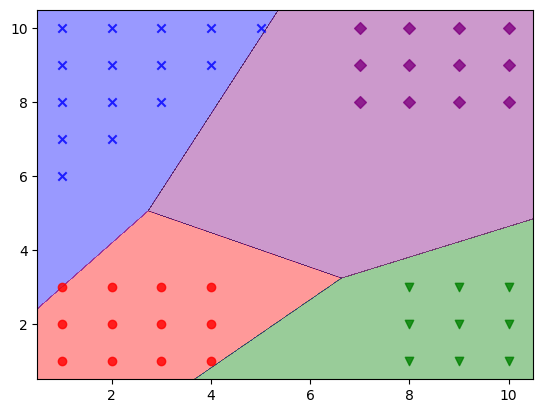

In [4]:
def plot_decision_regions(x, y, w,b):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x', 'v','D')
    # define available colors
    cmap = ListedColormap(('red', 'blue','green','purple'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = label_return_plot(w,b,np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()

plot_decision_regions(x,y,w,b)

In [5]:
#7
data1 = pd.read_csv(r"C:\Users\jason\Desktop\cse 151a\hw7\data1.txt", header = None, sep = ' ')
data1.columns = ['var1','var2','label']
x1 = data1[['var1','var2']].to_numpy()
y1 = data1['label'].to_numpy()
data2 = pd.read_csv(r"C:\Users\jason\Desktop\cse 151a\hw7\data2.txt", header = None, sep = ' ')
data2.columns = ['var1','var2','label']
x2 = data2[['var1','var2']].to_numpy()
y2 = data2['label'].to_numpy()

In [17]:
#7
def kernelperceptron(data, labels):
    a = np.zeros(len(data))
    b = 0
    while True:
        errors = 0
        for i in range(len(labels)):
            xi = data[i]
            yi = labels[i]
            predict = np.sign(np.sum(a * labels * ((1+np.dot(data, xi))**2) )+ b)
            if predict != yi:
                a[i] += 1
                b = b + yi
                errors += 1
        print(errors)
        if errors == 0:
            break



    return (a, b)

def kernel_predict(data,labels,xi,a,b):
    return np.sign(np.sum(a * labels * ((1+np.dot(data, xi))**2) )+ b)

def plot_decision_regions2(x, y, a,b):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = np.array([kernel_predict(x,y,xi,a,b) for xi in np.array([xx1.ravel(),xx2.ravel()]).T])
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()



2
11
7
8
9
7
5
1
0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


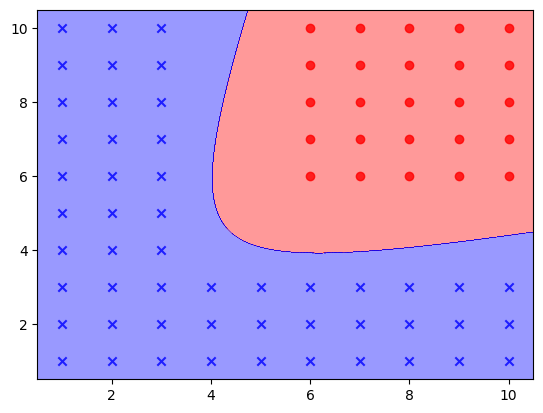

In [18]:
#7a data1
a1,b1 = kernelperceptron(x1,y1)
plot_decision_regions2(x1,y1,a1,b1)

3
4
6
5
6
7
7
8
7
8
7
7
8
8
10
7
8
8
8
10
8
11
10
10
10
8
11
10
8
11
10
11
7
10
7
12
11
12
9
9
12
10
11
10
11
10
7
9
9
9
9
11
9
8
10
7
7
9
10
7
10
9
9
7
9
7
9
8
7
7
11
9
7
8
8
10
11
8
9
9
9
8
7
9
9
8
8
10
10
8
8
9
11
10
9
8
9
9
10
8
7
8
9
7
9
8
9
7
9
7
7
9
6
7
8
7
9
8
10
13
8
8
9
10
10
7
7
9
6
7
7
8
8
9
11
11
9
8
10
12
9
11
8
8
9
8
8
9
9
8
7
10
9
11
10
7
10
12
9
9
10
11
9
8
8
7
10
8
7
7
7
6
7
8
8
9
11
9
7
7
7
8
10
9
8
9
6
7
8
8
8
8
7
6
7
6
7
7
9
8
7
8
8
7
6
6
7
9
8
9
8
9
8
9
9
10
7
9
9
8
8
9
10
7
9
8
10
9
9
9
9
12
10
7
9
9
7
7
9
9
9
9
10
11
8
10
7
7
7
7
7
6
7
10
10
8
10
9
10
10
7
7
10
9
10
8
7
7
10
8
7
7
7
7
8
8
10
9
9
8
8
10
11
9
7
10
7
9
8
10
9
10
8
8
9
8
10
8
8
9
10
9
9
10
10
8
9
7
9
7
7
7
9
7
7
6
8
10
9
9
9
10
7
7
6
10
9
11
9
10
7
7
5
7
6
7
9
9
8
6
5
7
9
7
7
7
6
7
8
7
7
10
7
7
6
6
6
7
6
6
9
8
10
7
7
7
6
6
7
10
10
9
7
6
7
9
8
9
8
9
7
7
9
8
8
9
6
5
7
9
7
6
6
6
6
6
6
7
7
6
7
10
8
10
7
7
6
6
7
6
6
7
6
6
7
6
6
8
6
6
9
11
6
6
9
6
6
8
6
7
9
7
6
9
8
8
5
6
9
8
8
5
6
5
6
7
8
7
9
7
6
6
7
8
8


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


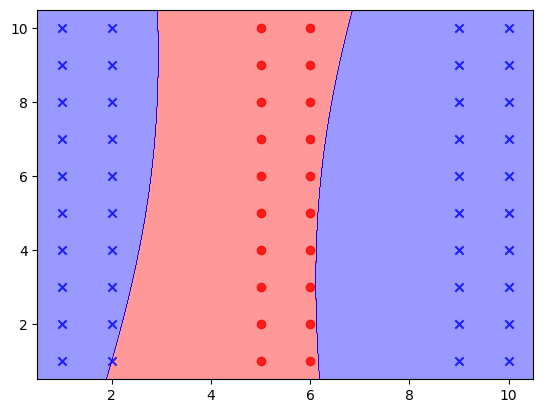

In [19]:
#7a data2
a2, b2 = kernelperceptron(x2,y2)
plot_decision_regions2(x2,y2,a2,b2)

In [22]:
#7b 
def rbfperceptron(data,labels,s):
    a = np.zeros(len(data))
    b = 0
    while True:
        errors = 0
        for i in range(len(labels)):
            xi = data[i]
            yi = labels[i]
            
            predict = np.sign(np.sum(a * labels * (np.exp(-np.dot(data-xi, (data-xi).T)/(s**2)))) + b)
            if predict != yi:
                a[i] += 1
                b = b + yi
                errors += 1
        print(errors)
        if errors == 0:
            break



    return (a, b)
    
def rbf_predict(data,labels,xi,a,b,s):
    return np.sign(np.sum(a * labels * (np.exp(-np.dot(data-xi, (data-xi).T)/(s**2)))) + b)

def plot_decision_regions_rbf(x, y, a,b,s):
    resolution = 0.01
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = np.array([rbf_predict(x,y,xi,a,b,s) for xi in np.array([xx1.ravel(),xx2.ravel()]).T])
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()

3
4
4
2
0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


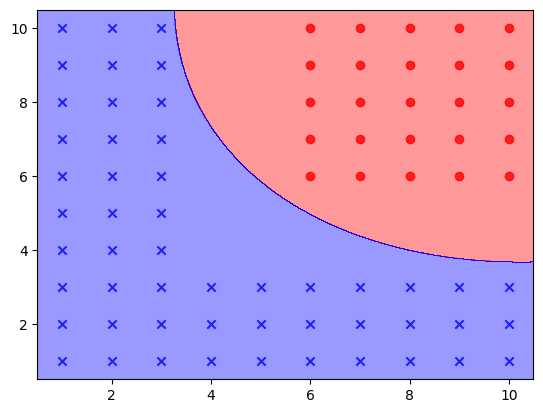

In [23]:
#7b data1
#sigma = 5 
a1, b1 = rbfperceptron(x1,y1, 5)
plot_decision_regions_rbf(x1,y1,a1,b1,5)

2
2
2
2
2
2
0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


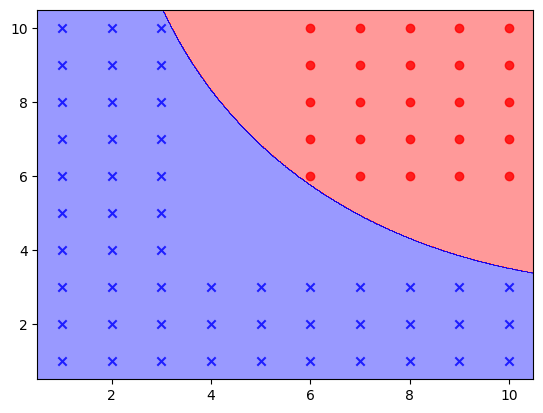

In [24]:
#7b data1
#sigma = 10
a1, b1 = rbfperceptron(x1,y1, 10)
plot_decision_regions_rbf(x1,y1,a1,b1,10)

4
2
2
3
4
6
1
2
5
1
4
3
3
3
4
3
3
3
2
2
0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


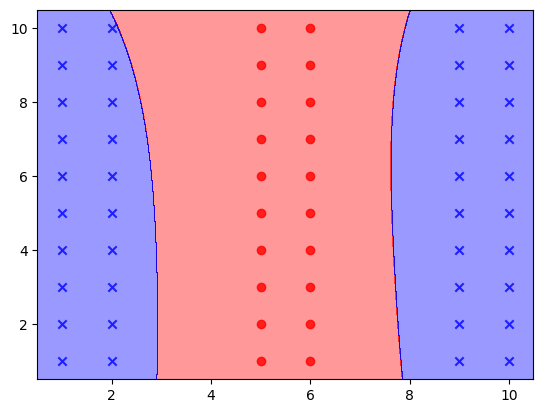

In [25]:
#7b data2
#sigma = 5 
a2,b2 = rbfperceptron(x2,y2, 5)
plot_decision_regions_rbf(x2,y2,a2,b2,5)

5
3
4
4
4
4
4
4
2
4
4
4
4
2
4
4
2
4
3
3
1
3
1
3
1
2
3
1
3
1
3
1
3
1
2
3
1
3
1
3
1
2
3
1
3
1
2
3
1
2
3
1
3
1
2
0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


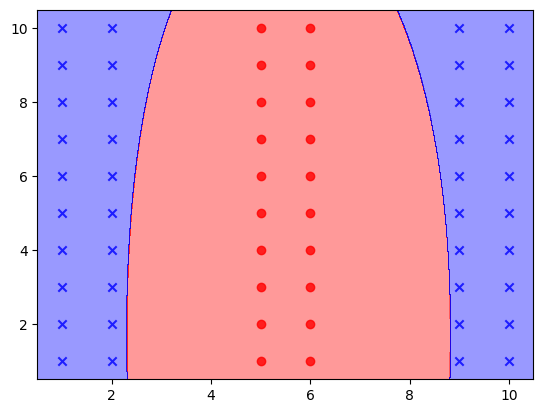

In [26]:
#7b data2
#sigma = 10
a2,b2 = rbfperceptron(x2,y2, 10)
plot_decision_regions_rbf(x2,y2,a2,b2,10)

In [4]:
#8a
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)

In [4]:
#8b
c_list = [0.01,0.1,1,10,100]
train_error = []
test_error = []
for i in c_list:
    clf = svm.LinearSVC(loss='hinge', C=i)
    train_error.append(1-clf.fit(X_train, y_train).score(X_train,y_train))
    test_error.append(1-clf.fit(X_train, y_train).score(X_test,y_test))


C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 

In [5]:
res1 = pd.DataFrame()
res1['C'] = c_list
res1['training error'] = train_error
res1['test error'] = test_error
res1

,C,training error,test error
0,0.01,0.119917,0.1359
1,0.10,0.122867,0.1336
2,1.00,0.139900,0.1293
3,10.00,0.148983,0.1771
4,100.00,0.118200,0.1249


In [5]:
#8c
c_list = [1]
train_error = []
test_error = []
sv = []
for i in c_list:
    clf = svm.SVC(kernel='poly', degree = 2, C=1)
    train_error.append(1-clf.fit(X_train, y_train).score(X_train,y_train))
    test_error.append(1-clf.fit(X_train, y_train).score(X_test,y_test))
    sv.append(len(clf.support_vectors_))

In [6]:
res2 = pd.DataFrame()
res2['C'] = c_list
res2['training error'] = train_error
res2['test error'] = test_error
res2['# of Support Vectors'] = sv
res2

,C,training error,test error,# of Support Vectors
0,1,0.012683,0.0242,10023
